# Jupyter notebook for plotting result figures in "JAWS-X: Addressing Efficiency Bottlenecks of Conformal Prediction Under Standard and Feedback Covariate Shift"

Notebook by Drew Prinster (drew@cs.jhu.edu)

Last updated August 10th, 2023

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

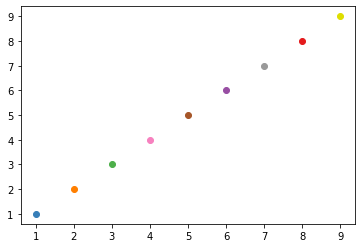

In [2]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

for i in range(0, len(CB_color_cycle)):
    plt.scatter(i+1, i+1, color=CB_color_cycle[i])

### Figure 2: JAW-FCS and baselines on protein design experiments (feedback covariate shift)

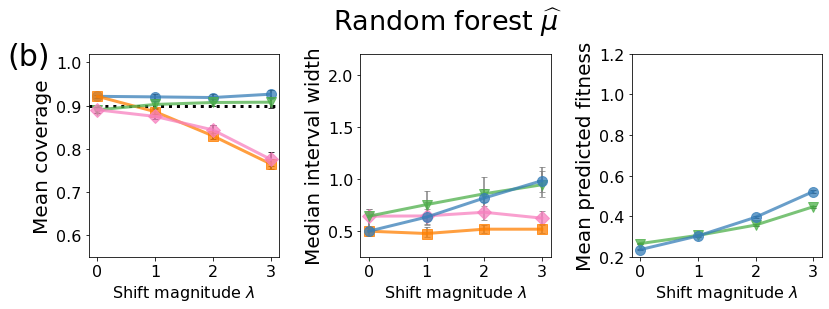

In [11]:
plot_legend=False


flur_color = 'red'
muh_name = 'RF'
ntrain = 192 ## 96, 192 ## 
K_str = '48'
metric = 'coverage'
n_seed = 20
n_test = 200
lmbdas = [0, 1, 2, 3]
capsize=3

wid_q = 0.25
wid_e_color = 'gray'

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Plotting params
markersize=10
linewidth=3
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
y_ax_label_size=20
x_ax_label_size=16
tick_sizes=16
suptitle_size=27
    
lmbda0_PIs_results = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda0_seed' + str(n_seed) + '_PIs_results_.csv')
lmbda1_PIs_results = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda1_seed' + str(n_seed) + '_PIs_results_.csv')
lmbda2_PIs_results = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda2_seed' + str(n_seed) + '_PIs_results_.csv')
lmbda3_PIs_results = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda3_seed' + str(n_seed) + '_PIs_results_.csv')


lmbda0_PIs_results_all = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda0_seed' + str(n_seed) + '_PIs_results_ALL.csv')
lmbda1_PIs_results_all = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda1_seed' + str(n_seed) + '_PIs_results_ALL.csv')
lmbda2_PIs_results_all = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda2_seed' + str(n_seed) + '_PIs_results_ALL.csv')
lmbda3_PIs_results_all = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda3_seed' + str(n_seed) + '_PIs_results_ALL.csv')


results = [lmbda0_PIs_results, lmbda1_PIs_results, lmbda2_PIs_results, lmbda3_PIs_results] # , lmbda4_PIs_results
results_all = [lmbda0_PIs_results_all, lmbda1_PIs_results_all, lmbda2_PIs_results_all, lmbda3_PIs_results_all] # , lmbda4_PIs_results


## Coverage
jackknife_plus_cov = []
jackknife_plus_cov_stderr = []
JAW_FCS_cov = []
JAW_FCS_cov_stderr = []
JAW_SCS_cov = []
JAW_SCS_cov_stderr = []
wsplit_cov = []
wsplit_cov_stderr = []
split_cov = []
split_cov_stderr = []
CV_cov = []
CV_cov_stderr = []
wCV_cov = []
wCV_cov_stderr = []
JAW_FCS_KLOO_cov = []
JAW_FCS_KLOO_cov_stderr = []

## Width
jackknife_plus_wid = []
jackknife_plus_wid_stderr_l = []
jackknife_plus_wid_stderr_u = []
JAW_FCS_wid = []
JAW_FCS_wid_stderr_l = []
JAW_FCS_wid_stderr_u = []
JAW_SCS_wid = []
JAW_SCS_wid_stderr_l = []
JAW_SCS_wid_stderr_u = []
wsplit_wid = []
wsplit_wid_stderr_l = []
wsplit_wid_stderr_u = []
split_wid = []
split_wid_stderr_l = []
split_wid_stderr_u = []
CV_wid = []
CV_wid_stderr_l = []
CV_wid_stderr_u = []
wCV_wid = []
wCV_wid_stderr_l = []
wCV_wid_stderr_u = []
JAW_FCS_KLOO_wid = []
JAW_FCS_KLOO_wid_stderr_l = []
JAW_FCS_KLOO_wid_stderr_u = []

## Fitness
jackknife_plus_fit = []
jackknife_plus_fit_stderr = []
JAW_FCS_fit = []
JAW_FCS_fit_stderr = []
JAW_SCS_fit = []
JAW_SCS_fit_stderr = []
wsplit_fit = []
wsplit_fit_stderr = []
split_fit = []
split_fit_stderr = []
CV_fit = []
CV_fit_stderr = []
wCV_fit = []
wCV_fit_stderr = []
JAW_FCS_KLOO_fit = []
JAW_FCS_KLOO_fit_stderr = []

for i in range(0, len(results)):
    result_df = results[i]
    result_df_all = results_all[i]
    
    jackknife_plus_cov_stderr.append(result_df[result_df['method']=='jackknife+']['coverage'].std() / np.sqrt(n_seed))
    jackknife_plus_cov.append(result_df[result_df['method']=='jackknife+']['coverage'].mean())
    JAW_FCS_cov.append(result_df[result_df['method']=='JAW-FCS']['coverage'].mean())
    JAW_FCS_cov_stderr.append(result_df[result_df['method']=='JAW-FCS']['coverage'].std() / np.sqrt(n_seed))
    JAW_SCS_cov.append(result_df[result_df['method']=='JAW-SCS']['coverage'].mean())
    JAW_SCS_cov_stderr.append(result_df[result_df['method']=='JAW-SCS']['coverage'].std() / np.sqrt(n_seed))
    wsplit_cov.append(result_df[result_df['method']=='weighted_split']['coverage'].mean())
    wsplit_cov_stderr.append(result_df[result_df['method']=='weighted_split']['coverage'].std() / np.sqrt(n_seed))
    split_cov.append(result_df[result_df['method']=='split']['coverage'].mean())
    split_cov_stderr.append(result_df[result_df['method']=='split']['coverage'].std() / np.sqrt(n_seed))
    CV_cov.append(result_df[result_df['method']=='CV+_K' + K_str]['coverage'].mean())
    CV_cov_stderr.append(result_df[result_df['method']=='CV+_K' + K_str]['coverage'].std() / np.sqrt(n_seed))
    wCV_cov.append(result_df[result_df['method']=='wCV_SCS_K' + K_str]['coverage'].mean())
    wCV_cov_stderr.append(result_df[result_df['method']=='wCV_SCS_K' + K_str]['coverage'].std() / np.sqrt(n_seed))
    JAW_FCS_KLOO_cov.append(result_df[result_df['method']=='JAW_FCS_KLOO_det_K' + K_str]['coverage'].mean())
    JAW_FCS_KLOO_cov_stderr.append(result_df[result_df['method']=='JAW_FCS_KLOO_det_K' + K_str]['coverage'].std() / np.sqrt(n_seed))
    
    jackknife_plus_wid.append(result_df_all[result_df_all['method']=='jackknife+']['width'].median())
    jackknife_plus_wid_stderr_l.append(np.abs(jackknife_plus_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='jackknife+']['width'], wid_q)))
    jackknife_plus_wid_stderr_u.append(np.abs(jackknife_plus_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='jackknife+']['width'], 1-wid_q)))
    
    JAW_FCS_wid.append(result_df_all[result_df_all['method']=='JAW-FCS']['width'].median())
    JAW_FCS_wid_stderr_l.append(np.abs(JAW_FCS_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW-FCS']['width'], wid_q)))
    JAW_FCS_wid_stderr_u.append(np.abs(JAW_FCS_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW-FCS']['width'], 1-wid_q)))
    
    JAW_SCS_wid.append(result_df_all[result_df_all['method']=='JAW-SCS']['width'].median())
    JAW_SCS_wid_stderr_l.append(np.abs(JAW_SCS_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW-SCS']['width'], wid_q)))
    JAW_SCS_wid_stderr_u.append(np.abs(JAW_SCS_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW-SCS']['width'], 1-wid_q)))
    
    wsplit_wid.append(result_df_all[result_df_all['method']=='weighted_split']['width'].median())
    wsplit_wid_stderr_l.append(np.abs(wsplit_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='weighted_split']['width'], wid_q)))
    wsplit_wid_stderr_u.append(np.abs(wsplit_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='weighted_split']['width'], 1-wid_q)))
    
    split_wid.append(result_df_all[result_df_all['method']=='split']['width'].median())
    split_wid_stderr_l.append(np.abs(split_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='split']['width'], wid_q)))
    split_wid_stderr_u.append(np.abs(split_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='split']['width'], 1-wid_q)))
    
    CV_wid.append(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'].median())
    CV_wid_stderr_l.append(np.abs(CV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'],wid_q)))
    CV_wid_stderr_u.append(np.abs(CV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'], 1-wid_q)))
    
    wCV_wid.append(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'].median())
    wCV_wid_stderr_l.append(np.abs(wCV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'], wid_q)))
    wCV_wid_stderr_u.append(np.abs(wCV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'], 1-wid_q)))
    
    JAW_FCS_KLOO_wid.append(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'].median())
    JAW_FCS_KLOO_wid_stderr_l.append(np.abs(JAW_FCS_KLOO_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'], wid_q)))
    JAW_FCS_KLOO_wid_stderr_u.append(np.abs(JAW_FCS_KLOO_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'], 1-wid_q)))
    
#     jackknife_plus_fit_stderr.append(result_df_all[result_df_all['method']=='jackknife+']['width'].std() / np.sqrt(n_seed))
#     jackknife_plus_fit.append(result_df_all[result_df_all['method']=='jackknife+']['width'].median())
    JAW_FCS_fit.append(result_df_all[result_df_all['method']=='JAW-FCS']['muh_test'].mean())
    JAW_FCS_fit_stderr.append(result_df_all[result_df_all['method']=='JAW-FCS']['muh_test'].std() / np.sqrt(n_seed*n_test))
#     JAW_SCS_fit.append(result_df_all[result_df_all['method']=='JAW-SCS']['width'].median())
#     JAW_SCS_fit_stderr.append(result_df_all[result_df_all['method']=='JAW-SCS']['width'].std() / np.sqrt(n_seed))
    wsplit_fit.append(result_df_all[result_df_all['method']=='weighted_split']['muh_test'].mean())
    wsplit_fit_stderr.append(result_df_all[result_df_all['method']=='weighted_split']['muh_test'].std() / np.sqrt(n_seed*n_test))
#     split_fit.append(result_df_all[result_df_all['method']=='split']['width'].median())
#     split_fit_stderr.append(result_df_all[result_df_all['method']=='split']['width'].std() / np.sqrt(n_seed))
#     CV_fit.append(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'].median())
#     CV_fit_stderr.append(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'].std() / np.sqrt(n_seed))
#     wCV_fit.append(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'].median())
#     wCV_fit_stderr.append(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'].std() / np.sqrt(n_seed))
#     JAW_FCS_KLOO_fit.append(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'].median())
#     JAW_FCS_KLOO_fit_stderr.append(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'].std() / np.sqrt(n_seed))
    
if (plot_legend):
    markersize=15
    
f, (ax1, ax3, ax2) = plt.subplots(1, 3, figsize=(12, 4.5))
f.tight_layout(pad=5.0)
if (muh_name == 'NN' and flur_color=='red'):
    f.text(x=-0.01, y=0.8, s='(a)', fontsize=30)
    f.suptitle('Neural network $\widehat{\mu}$', fontsize=suptitle_size)
if (muh_name == 'RF' and flur_color=='red'):
    f.text(x=-0.01, y=0.8, s='(b)', fontsize=30)
    f.suptitle('Random forest $\widehat{\mu}$', fontsize=suptitle_size)
if (muh_name == 'NN' and flur_color=='blue'):
    f.text(x=-0.01, y=0.8, s='(c)', fontsize=30)
if (muh_name == 'RF' and flur_color=='blue'):
    f.text(x=-0.01, y=0.8, s='(d)', fontsize=30)
#     f.suptitle('Blue fluorescence, random forest $\widehat{\mu}$', fontsize=suptitle_size)

#     f.suptitle('Blue fluorescence, neural network $\widehat{\mu}$', fontsize=suptitle_size)


ax1.errorbar(lmbdas, JAW_FCS_cov, marker='o', yerr = JAW_FCS_cov_stderr, ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize, elinewidth=2)
ax1.errorbar(lmbdas, jackknife_plus_cov, marker='s', yerr = jackknife_plus_cov_stderr, ecolor = 'black', label = 'jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], capsize=capsize, elinewidth=2)

ax1.errorbar(lmbdas, wsplit_cov, marker='v', yerr = wsplit_cov_stderr, ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize, elinewidth=2)
ax1.errorbar(lmbdas, split_cov, marker='D', yerr = split_cov_stderr, ecolor = 'black', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3], capsize=capsize, elinewidth=2)
# ax1.errorbar(lmbdas, JAW_SCS_cov, marker=marker, yerr = JAW_SCS_cov_stderr, ecolor = 'black', label = 'JAW-SCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color='C4', capsize=capsize)
# ax1.errorbar(lmbdas, wCV_cov, marker=marker, yerr = wCV_cov_stderr, ecolor = 'black', label = 'wCV+_K'+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[4], capsize=capsize)
# ax1.errorbar(lmbdas, JAW_FCS_KLOO_cov, marker=marker, yerr = JAW_FCS_KLOO_cov_stderr, ecolor = 'black', label = 'JAW_FCS_KLOO_det_K' + K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[5], capsize=capsize)
# ax1.errorbar(lmbdas, CV_cov, marker=marker, yerr = CV_cov_stderr, ecolor = 'black', label = 'CV+_K'+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[6], capsize=capsize)

ax1.set_ylabel('Mean coverage', fontsize=y_ax_label_size)
ax1.set_xlabel('Shift magnitude $\lambda$', fontsize=x_ax_label_size)
ax1.set_xticks(lmbdas)
ax1.set_ylim([0.55,1.02])
ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=3, label='Target coverage')
ax1.tick_params(axis='both', labelsize=tick_sizes)


    
ax2.errorbar(lmbdas, wsplit_fit, marker='v', yerr = wsplit_fit_stderr, ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize, elinewidth=2)
ax2.errorbar(lmbdas, JAW_FCS_fit, marker='o', yerr = JAW_FCS_fit_stderr, ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize, elinewidth=2)
ax2.set_ylabel('Mean predicted fitness', fontsize=y_ax_label_size)
ax2.set_xlabel('Shift magnitude $\lambda$', fontsize=x_ax_label_size)
ax2.tick_params(axis='both', labelsize=tick_sizes)
ax2.set_xticks(lmbdas)
ax2.set_ylim([0.2,1.2])

if (plot_legend):
    handles, labels = ax1.get_legend_handles_labels()
    order = [1,2,3,4,0]
    ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[0,1.1],ncol=3,fontsize=20)

# ax1.legend(loc=[0,1.1],ncol=3,fontsize=20)


ax3.errorbar(lmbdas, split_wid, marker='D', yerr = np.vstack((split_wid_stderr_l, split_wid_stderr_u)), ecolor = wid_e_color, label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3], capsize=capsize, elinewidth=2)
ax3.errorbar(lmbdas, wsplit_wid, marker='v', yerr = np.vstack((wsplit_wid_stderr_l, wsplit_wid_stderr_u)), ecolor = wid_e_color, label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize, elinewidth=2)
# ax3.errorbar(lmbdas, JAW_SCS_wid, marker=marker, yerr = JAW_SCS_wid_stderr, ecolor = wid_e_color, label = 'JAW-SCS', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color='C4', capsize=capsize)
ax3.errorbar(lmbdas, jackknife_plus_wid, marker='s', yerr = np.vstack((jackknife_plus_wid_stderr_l, jackknife_plus_wid_stderr_u)), ecolor = wid_e_color, label = 'jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], capsize=capsize, elinewidth=2)
ax3.errorbar(lmbdas, JAW_FCS_wid, marker='o', yerr = np.vstack((JAW_FCS_wid_stderr_l, JAW_FCS_wid_stderr_u)), ecolor = wid_e_color, label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize, elinewidth=2)
# ax3.errorbar(lmbdas, wCV_wid, marker=marker, yerr = wCV_wid_stderr, ecolor = wid_e_color, label = 'wCV+_K'+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[4], capsize=capsize)
# ax3.errorbar(lmbdas, JAW_FCS_KLOO_wid, marker=marker, yerr = JAW_FCS_KLOO_wid_stderr, ecolor = wid_e_color, label = 'JAW_FCS_KLOO_det_K' + K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[5], capsize=capsize)
# ax3.errorbar(lmbdas, CV_wid, marker=marker, yerr = CV_wid_stderr, ecolor = wid_e_color, label = 'CV+_K'+ K_str,  linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[6], capsize=capsize)

ax3.set_ylabel('Median interval width', fontsize=y_ax_label_size)
ax3.set_xlabel('Shift magnitude $\lambda$', fontsize=x_ax_label_size)
ax3.set_xticks(lmbdas, fontsize=14)

ax3.set_ylim([0.25,2.2])
ax3.tick_params(axis='both', labelsize=tick_sizes)


if (plot_legend):
    f.savefig('./results_figures/fig2_legend.png', dpi=100, bbox_inches='tight')
else:
    f.savefig('./results_figures/fig2_' + muh_name + '_' + flur_color + '.png', dpi=100, bbox_inches='tight')



### Figure 3: Further computational relaxations (JAW-$K$LOO and WCV+) on protein design experiments (feedback covariate shift)

/gpfs/ycga/project/christakis/ajp65/conda_envs/PredictorAudit/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/gpfs/ycga/project/christakis/ajp65/conda_envs/PredictorAudit/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


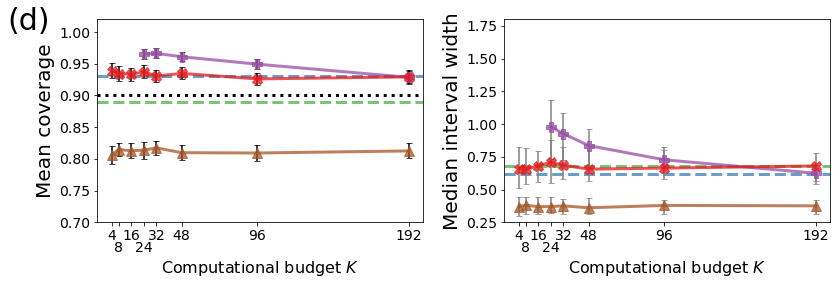

In [13]:
plot_legend = False
flur_color = 'blue'
muh_name = 'RF'
ntrain = 192 ## 96, 192 ## 
metric = 'coverage'
n_seed = 20
lmbdas = [0, 1, 2, 3]
lmbda = 2

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Plotting params
markersize=10
linewidth=3
transparency=0.75
linestyle_wid='--'
y_ax_label_size=20
x_ax_label_size=16
tick_sizes=14
suptitle_size=25

if (plot_legend):
    markersize=15

K_vals = [4, 8, 16, 24, 32, 48, 96, 192]
K_vals_str = [ '4', '8', '16', '24', '32', '48', '96', '192']

result_highK_df = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda' + str(lmbda) + '_seed' + str(n_seed) + '_PIs_results_BySeed.csv')
result_lowK_df = pd.read_csv('./results/2023-06-05_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda' + str(lmbda) + '_seed' + str(n_seed) + '_PIs_results_BySeed.csv')

result_highK_df_all = pd.read_csv('./results/2023-01-23_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda' + str(lmbda) + '_seed' + str(n_seed) + '_PIs_results_ALL.csv')
result_lowK_df_all = pd.read_csv('./results/2023-06-05_' + flur_color + '_' + str(muh_name) + '_ntrain' + str(ntrain) + '_lmbda' + str(lmbda) + '_seed' + str(n_seed) + '_PIs_results_ALL.csv')


## Coverage
jackknife_plus_cov = []
jackknife_plus_cov_stderr = []
JAW_FCS_cov = []
JAW_FCS_cov_stderr = []
JAW_SCS_cov = []
JAW_SCS_cov_stderr = []
wsplit_cov = []
wsplit_cov_stderr = []
split_cov = []
split_cov_stderr = []
CV_cov = []
CV_cov_stderr = []
wCV_cov = []
wCV_cov_stderr = []
JAW_FCS_KLOO_cov = []
JAW_FCS_KLOO_cov_stderr = []

## Width
jackknife_plus_wid = []
jackknife_plus_wid_stderr = []
JAW_FCS_wid = []
JAW_FCS_wid_stderr = []
JAW_SCS_wid = []
JAW_SCS_wid_stderr = []
wsplit_wid = []
wsplit_wid_stderr = []
split_wid = []
split_wid_stderr = []
CV_wid = []
CV_wid_stderr_l = []
CV_wid_stderr_u = []
wCV_wid = []
wCV_wid_stderr_l = []
wCV_wid_stderr_u = []
JAW_FCS_KLOO_wid = []
JAW_FCS_KLOO_wid_stderr_l = []
JAW_FCS_KLOO_wid_stderr_u = []



for K_str in K_vals_str:
    if (int(K_str) >= 8):
        result_df = result_highK_df
        result_df_all = result_highK_df_all
    else:
        result_df = result_lowK_df
        result_df_all = result_lowK_df_all
    
    jackknife_plus_cov_stderr.append(result_df[result_df['method']=='jackknife+']['coverage'].std() / np.sqrt(n_seed))
    jackknife_plus_cov.append(result_df[result_df['method']=='jackknife+']['coverage'].mean())
    JAW_FCS_cov.append(result_df[result_df['method']=='JAW-FCS']['coverage'].mean())
    JAW_FCS_cov_stderr.append(result_df[result_df['method']=='JAW-FCS']['coverage'].std() / np.sqrt(n_seed))
    JAW_SCS_cov.append(result_df[result_df['method']=='JAW-SCS']['coverage'].mean())
    JAW_SCS_cov_stderr.append(result_df[result_df['method']=='JAW-SCS']['coverage'].std() / np.sqrt(n_seed))
    wsplit_cov.append(result_df[result_df['method']=='weighted_split']['coverage'].mean())
    wsplit_cov_stderr.append(result_df[result_df['method']=='weighted_split']['coverage'].std() / np.sqrt(n_seed))
    split_cov.append(result_df[result_df['method']=='split']['coverage'].mean())
    split_cov_stderr.append(result_df[result_df['method']=='split']['coverage'].std() / np.sqrt(n_seed))
    CV_cov.append(result_df[result_df['method']=='CV+_K' + K_str]['coverage'].mean())
    CV_cov_stderr.append(result_df[result_df['method']=='CV+_K' + K_str]['coverage'].std() / np.sqrt(n_seed))
    wCV_cov.append(result_df[result_df['method']=='wCV_FCS_K' + K_str]['coverage'].mean())
    wCV_cov_stderr.append(result_df[result_df['method']=='wCV_FCS_K' + K_str]['coverage'].std() / np.sqrt(n_seed))
    JAW_FCS_KLOO_cov.append(result_df[result_df['method']=='JAW_FCS_KLOO_det_K' + K_str]['coverage'].mean())
    JAW_FCS_KLOO_cov_stderr.append(result_df[result_df['method']=='JAW_FCS_KLOO_det_K' + K_str]['coverage'].std() / np.sqrt(n_seed))
    
    jackknife_plus_wid_stderr.append(result_df[result_df['method']=='jackknife+']['width'].std() / np.sqrt(n_seed))
    jackknife_plus_wid.append(result_df[result_df['method']=='jackknife+']['width'].median())
    JAW_FCS_wid.append(result_df[result_df['method']=='JAW-FCS']['width'].median())
    JAW_FCS_wid_stderr.append(result_df[result_df['method']=='JAW-FCS']['width'].std() / np.sqrt(n_seed))
    JAW_SCS_wid.append(result_df[result_df['method']=='JAW-SCS']['width'].median())
    JAW_SCS_wid_stderr.append(result_df[result_df['method']=='JAW-SCS']['width'].std() / np.sqrt(n_seed))
    wsplit_wid.append(result_df[result_df['method']=='weighted_split']['width'].median())
    wsplit_wid_stderr.append(result_df[result_df['method']=='weighted_split']['width'].std() / np.sqrt(n_seed))
    split_wid.append(result_df[result_df['method']=='split']['width'].median())
    split_wid_stderr.append(result_df[result_df['method']=='split']['width'].std() / np.sqrt(n_seed))
#     CV_wid.append(result_df[result_df['method']=='CV+_K' + K_str]['width'].median())
#     CV_wid_stderr.append(result_df[result_df['method']=='CV+_K' + K_str]['width'].std() / np.sqrt(n_seed))
#     wCV_wid.append(result_df[result_df['method']=='wCV_FCS_K' + K_str]['width'].median())
#     wCV_wid_stderr.append(result_df[result_df['method']=='wCV_FCS_K' + K_str]['width'].std() / np.sqrt(n_seed))
#     JAW_FCS_KLOO_wid.append(result_df[result_df['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'].median())
#     JAW_FCS_KLOO_wid_stderr.append(result_df[result_df['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'].std() / np.sqrt(n_seed))
    CV_wid.append(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'].median())
    CV_wid_stderr_l.append(np.abs(CV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'],wid_q)))
    CV_wid_stderr_u.append(np.abs(CV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='CV+_K' + K_str]['width'], 1-wid_q)))
    
    wCV_wid.append(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'].median())
    wCV_wid_stderr_l.append(np.abs(wCV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'], wid_q)))
    wCV_wid_stderr_u.append(np.abs(wCV_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='wCV_SCS_K' + K_str]['width'], 1-wid_q)))
    
    JAW_FCS_KLOO_wid.append(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'].median())
    JAW_FCS_KLOO_wid_stderr_l.append(np.abs(JAW_FCS_KLOO_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'], wid_q)))
    JAW_FCS_KLOO_wid_stderr_u.append(np.abs(JAW_FCS_KLOO_wid[-1] - np.quantile(result_df_all[result_df_all['method']=='JAW_FCS_KLOO_det_K' + K_str]['width'], 1-wid_q)))
    
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
f.tight_layout(pad=5.0)
if (muh_name == 'RF' and flur_color=='red'):
    f.suptitle('Random forest $\widehat{\mu}$', fontsize=suptitle_size)
elif (muh_name == 'NN' and flur_color=='red'):
    f.suptitle('Neural network $\widehat{\mu}$', fontsize=suptitle_size)
    
if (muh_name == 'NN' and flur_color=='red'):
    f.text(x=-0.02, y=0.8, s='(a)', fontsize=30)
    f.suptitle('Neural network $\widehat{\mu}$', fontsize=suptitle_size)
if (muh_name == 'RF' and flur_color=='red'):
    f.text(x=-0.02, y=0.8, s='(b)', fontsize=30)
    f.suptitle('Random forest $\widehat{\mu}$', fontsize=suptitle_size)
if (muh_name == 'NN' and flur_color=='blue'):
    f.text(x=-0.02, y=0.8, s='(c)', fontsize=30)
if (muh_name == 'RF' and flur_color=='blue'):
    f.text(x=-0.02, y=0.8, s='(d)', fontsize=30)

# ax1.errorbar(K_vals, JAW_FCS_cov, marker='o', yerr = JAW_FCS_cov_stderr, ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0])
# ax1.errorbar(K_vals, jackknife_plus_cov, marker='s', yerr = jackknife_plus_cov_stderr, ecolor = 'black', label = 'jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1])
# ax1.errorbar(K_vals, wsplit_cov[0], marker='v', yerr = wsplit_cov_stderr, ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2])

# ax1.errorbar(K_vals, split_cov, marker='X', yerr = split_cov_stderr, ecolor = 'black', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3])
# ax1.errorbar(K_vals, JAW_SCS_cov, marker=marker, yerr = JAW_SCS_cov_stderr, ecolor = 'black', label = 'JAW-SCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color='C4')
ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=3, label='Target coverage')

ax1.axhline(y = JAW_FCS_cov[0], color = CB_color_cycle[0], linewidth=linewidth, alpha =transparency, label='JAW-FCS', linestyle='--')
ax1.errorbar(K_vals[3:], JAW_FCS_KLOO_cov[3:], marker='P', yerr = JAW_FCS_KLOO_cov_stderr[3:], ecolor = 'black', label = 'JAW-KLOO', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[5], capsize=capsize,elinewidth=2)
ax1.errorbar(K_vals, wCV_cov, marker='X', yerr = wCV_cov_stderr, ecolor = 'black', label = 'WCV+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[7], capsize=capsize,elinewidth=2)
ax1.axhline(y = wsplit_cov[0], linewidth=linewidth, label='weighted split', alpha =transparency, color=CB_color_cycle[2], linestyle='--')
# ax1.errorbar(K_vals, wsplit_cov, label='weighted split', color=CB_color_cycle[2])
ax1.errorbar(K_vals, CV_cov, marker='^', yerr = CV_cov_stderr, ecolor = 'black', label = 'CV+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[4], capsize=capsize,elinewidth=2)


ax1.set_ylabel('Mean coverage', fontsize=y_ax_label_size)
ax1.set_xlabel('Computational budget $K$', fontsize=x_ax_label_size)
ax1.set_xticks(K_vals)
ax1.set_ylim([0.7,1.02])
ax1.tick_params(axis='both', labelsize=tick_sizes)
ax1.xaxis.get_major_ticks()[1].set_pad(15)
ax1.xaxis.get_major_ticks()[3].set_pad(15)
# ax1.xaxis.get_major_ticks()[5].set_pad(15)


# ax1.legend(loc=[0,1.1],ncol=3,fontsize=20)
# ax1.legend(loc=[0,1.1],ncol=5,fontsize=20)


if (plot_legend):
    handles, labels = ax1.get_legend_handles_labels()
#     order = [4,5,3,2,1,0]
#     ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[0,1.1],ncol=3,fontsize=20)
    order = [4,3,5,1,2,0]
    ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[0,1.1],ncol=3,fontsize=20)

# ax2.errorbar(K_vals, split_wid, marker='X', yerr = split_wid_stderr, ecolor = 'black', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[3])
# ax2.errorbar(K_vals, wsplit_wid, marker='v', yerr = wsplit_wid_stderr, ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[2])
# # ax2.errorbar(K_vals, JAW_SCS_wid, marker=marker, yerr = JAW_SCS_wid_stderr, ecolor = 'black', label = 'JAW-SCS', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color='C4')
# ax2.errorbar(K_vals, jackknife_plus_wid, marker='s', yerr = jackknife_plus_wid_stderr, ecolor = 'black', label = 'jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[1])
# ax2.errorbar(K_vals, JAW_FCS_wid, marker='o', yerr = JAW_FCS_wid_stderr, ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, linestyle=linestyle_wid, color=CB_color_cycle[0])
ax2.axhline(y = JAW_FCS_wid[0], color = CB_color_cycle[0], linewidth=linewidth, alpha =transparency, linestyle='--', label='JAW-FCS')
ax2.errorbar(K_vals[3:], JAW_FCS_KLOO_wid[3:], marker='P', yerr = np.vstack((JAW_FCS_KLOO_wid_stderr_l[3:], JAW_FCS_KLOO_wid_stderr_u[3:])), ecolor = 'gray', label = 'JAW-FCS-KLOO', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[5], capsize=capsize,elinewidth=2)
ax2.errorbar(K_vals, wCV_wid, marker='X', yerr = np.vstack((wCV_wid_stderr_l, wCV_wid_stderr_u)), ecolor = 'gray', label = 'wCV+_K', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[7], capsize=capsize,elinewidth=2)
ax2.axhline(y = wsplit_wid[0], color = CB_color_cycle[2], linewidth=linewidth, alpha =transparency, linestyle='--')
ax2.errorbar(K_vals, CV_wid, marker='^', yerr = np.vstack((CV_wid_stderr_l, CV_wid_stderr_u)), ecolor = 'gray', label = 'CV+_K',  linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[4], capsize=capsize,elinewidth=2)

ax2.set_ylabel('Median interval width', fontsize=y_ax_label_size)
ax2.set_xlabel('Computational budget $K$', fontsize=x_ax_label_size)
ax2.set_xticks(K_vals, fontsize=14)
# if (muh_name == 'RF'):
#     ax2.set_ylim([0.25,1.5])
# elif (muh_name == 'NN'):
ax2.set_ylim([0.25,1.8])
ax2.tick_params(axis='both', labelsize=tick_sizes)
# for tick in ax2.xaxis.get_major_ticks()[1::2]:
ax2.xaxis.get_major_ticks()[1].set_pad(15)
ax2.xaxis.get_major_ticks()[3].set_pad(15)
# ax2.xaxis.get_major_ticks()[5].set_pad(15)


# plt.errorbar(K_vals, JAW_FCS, marker='o', yerr = JAW_FCS_stderr, ecolor = 'black', label = 'JAW_FCS')
# plt.errorbar(K_vals, wCV, marker='o', yerr = wCV_stderr, ecolor = 'black', label = 'wCV+_K')
# plt.errorbar(K_vals, JAW_FCS_KLOO, marker='o', yerr = JAW_FCS_KLOO_stderr, ecolor = 'black', label = 'JAW_FCS_KLOO_det_K')
# plt.errorbar(K_vals, CV, marker='o', yerr = CV_stderr, ecolor = 'black', label = 'CCV+_K')
# plt.ylabel('Mean coverage', fontsize=16)
# plt.xticks(K_vals)
# plt.xlabel("Computational budget K", fontsize=16)


# plt.ylim([0.65,1.02])
# plt.axhline(y = 0.9, linestyle = '--', color = 'black')
# plt.legend(loc=[0,1.02], ncol=6)

if (plot_legend):
    f.savefig('./results_figures/fig3_legend.png', dpi=100, bbox_inches='tight')
else:
    f.savefig('./results_figures/fig3_' + muh_name + '_' + flur_color + '.png', dpi=100, bbox_inches='tight')


### Figure 4: JAWS-X methods on active learning experiments (feedback covariate shift but not protein design) with estimated rather than oracle weights

In [10]:
# seeds = [110, 190, 200, 20, 220, 240, 300]
# n_seeds = len(seeds)*2
# data = []
# for i in seeds:
#     if (len(data)==0):
#         data = pd.read_csv('2023-03-19_ActiveLearningExpts_airfoil_GP_steps9_nseed3_iseed' + str(i) + '_PIs_results_BySeed.csv')
#     else:
#         data = pd.concat([data, pd.read_csv('2023-03-19_ActiveLearningExpts_airfoil_GP_steps9_nseed3_iseed' + str(i) + '_PIs_results_BySeed.csv')])
data=[]
data_all = []
# seeds = [310, 240, 180, 150, 100, 10, 120, 160, 170, 190, 200, 20, 220, 240, 260, 290, 30, 310, 50, 70, 90]
# seeds = [100, 10, 110, 120, 140, 150, 160, 170, 180, 190, 200, 20, 230, 240, 260, 290, 30, 310, 40, 70, 90, 270, 280, 60]
seeds2 = [210, 250, 270, 280, 60]
seeds1 = [100, 10, 120, 130, 140, 150, 160, 170, 180, 190, 200, 20,  220, 240, 260, 290, 300, 30, 310, 40, 50, 70, 80, 90]

n_seeds = len(seeds2)*2 + len(seeds1)
for i in seeds2:
    file_i = './results/2023-03-19_ActiveLearningExpts_airfoil_GP_itrain32_steps8_nseed3_iseed' + str(i) + '_PIs_results_BySeed_v2.csv'
    file_all_i = './results/2023-03-19_ActiveLearningExpts_airfoil_GP_itrain32_steps8_nseed3_iseed' + str(i) + '_PIs_results_ALL_v2.csv'

    if (os.path.exists(file_i)):
        if (len(data)==0):
            data = pd.read_csv(file_i)
            data_all = pd.read_csv(file_all_i)
        else:
            data = pd.concat([data, pd.read_csv(file_i)])
            data_all = pd.concat([data_all, pd.read_csv(file_all_i)])

for i in seeds1:
    file_i = './results/2023-03-19_ActiveLearningExpts_airfoil_GP_itrain32_steps8_nseed2_iseed' + str(i) + '_PIs_results_BySeed_v2.csv'
    file_all_i = './results/2023-03-19_ActiveLearningExpts_airfoil_GP_itrain32_steps8_nseed2_iseed' + str(i) + '_PIs_results_ALL_v2.csv'

    if (os.path.exists(file_i)):
        if (len(data)==0):
            data = pd.read_csv(file_i)
            data_all = pd.read_csv(file_all_i)
        else:
            data = pd.concat([data, pd.read_csv(file_i)])
            data_all = pd.concat([data_all, pd.read_csv(file_all_i)])


In [19]:
len(sorted(list(set(data['seed']))))

16

In [ ]:
flur_color = 'red'
muh_name = 'NN'
ntrain = 192 ## 96, 192 ## 
K_str = '16'
metric = 'coverage'
n_seed = 30
n_test = 200
lmbdas = [0, 1, 2, 3]
capsize=3

wid_q = 0.25
wid_e_color = 'gray'

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Plotting params
markersize=10
linewidth=3
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
y_ax_label_size=17
x_ax_label_size=14
n_steps = 8

tick_sizes=14
suptitle_size=25
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


# Coverage
JAW_FCS_cov = data[data['method']=='JAW-FCS'].groupby(['step']).mean()['coverage']
JAW_FCS_cov_stderr = np.array(data[data['method']=='JAW-FCS'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]


jackknife_plus_cov = data[data['method']=='jackknife+'].groupby(['step']).mean()['coverage']
jackknife_plus_cov_stderr = np.array(data[data['method']=='jackknife+'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

wCV_cov = data[data['method']=='wCV_FCS_K16'].groupby(['step']).mean()['coverage']
wCV_cov_stderr = np.array(data[data['method']=='wCV_FCS_K16'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

CV_cov = data[data['method']=='CV+_K16'].groupby(['step']).mean()['coverage']
CV_cov_stderr = np.array(data[data['method']=='CV+_K16'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

wsplit_cov = data[data['method']=='weighted_split'].groupby(['step']).mean()['coverage']
wsplit_cov_stderr = np.array(data[data['method']=='weighted_split'][['coverage', 'step']].groupby(['step']).std()/ np.sqrt(n_seeds)).T[0]

split_cov = data[data['method']=='split'].groupby(['step']).mean()['coverage']
split_cov_stderr = np.array(data[data['method']=='split'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

JAW_FCS_KLOO_cov = data[data['method']=='JAW_FCS_KLOO_det_K16'].groupby(['step']).mean()['coverage']
JAW_FCS_KLOO_cov_stderr = np.array(data[data['method']=='JAW_FCS_KLOO_det_K16'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]


## Width
JAW_FCS_wid = data[data['method']=='JAW-FCS'].groupby(['step']).median()['width']
# JAW_FCS_wid_stderr = np.array(data[data['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]
# print(data_all[data_all['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).quantile(1 - wid_q))
# print(JAW_FCS_wid)
# print("np.array(JAW_FCS_wid)", np.array(JAW_FCS_wid))
# print("np.array(data_all[data_all['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).quantile(wid_q)", np.array(data_all[data_all['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0])

JAW_FCS_wid_stderr_l = np.array(JAW_FCS_wid) - np.array(data_all[data_all['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
JAW_FCS_wid_stderr_u = np.array(data_all[data_all['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(JAW_FCS_wid)
# JAW_FCS_wid_stderr_u = np.array(data[data['method']=='JAW-FCS'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]



jackknife_plus_wid = data[data['method']=='jackknife+'].groupby(['step']).median()['width']
jackknife_plus_wid_stderr_l = np.array(jackknife_plus_wid) - np.array(data_all[data_all['method']=='jackknife+'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
jackknife_plus_wid_stderr_u = np.array(data_all[data_all['method']=='jackknife+'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(jackknife_plus_wid)

# jackknife_plus_wid_stderr = np.array(data[data['method']=='jackknife+'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]


wCV_wid = data[data['method']=='wCV_FCS_K16'].groupby(['step']).median()['width']
# wCV_wid_stderr = np.array(data[data['method']=='wCV_FCS_K16'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]
wCV_wid_stderr_l = np.array(wCV_wid) - np.array(data_all[data_all['method']=='wCV_FCS_K16'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
wCV_wid_stderr_u = np.array(data_all[data_all['method']=='wCV_FCS_K16'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(wCV_wid)


CV_wid = data[data['method']=='CV+_K16'].groupby(['step']).median()['width']
CV_wid_stderr_l = np.array(CV_wid) - np.array(data_all[data_all['method']=='CV+_K16'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
CV_wid_stderr_u = np.array(data_all[data_all['method']=='CV+_K16'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(CV_wid)


wsplit_wid = data[data['method']=='weighted_split'].groupby(['step']).median()['width']
# wsplit_wid_stderr = np.array(data[data['method']=='weighted_split'][['width', 'step']].groupby(['step']).std()/ np.sqrt(n_seeds)).T[0]
wsplit_wid_stderr_l = np.array(wsplit_wid) - np.array(data_all[data_all['method']=='weighted_split'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
# wsplit_wid_stderr_u = np.array(data_all[data_all['method']=='weighted_split'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(wsplit_wid)
wsplit_wid_stderr_u = 30*np.ones(n_steps)

split_wid = data[data['method']=='split'].groupby(['step']).median()['width']
split_wid_stderr_l = np.array(split_wid) - np.array(data_all[data_all['method']=='split'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
split_wid_stderr_u = np.array(data_all[data_all['method']=='split'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(split_wid)

JAW_FCS_KLOO_wid = data[data['method']=='JAW_FCS_KLOO_det_K16'].groupby(['step']).median()['width']
JAW_FCS_KLOO_wid_stderr_l = np.array(JAW_FCS_KLOO_wid) - np.array(data_all[data_all['method']=='JAW_FCS_KLOO_det_K16'][['width', 'step']].groupby(['step']).quantile(wid_q)).T[0]
JAW_FCS_KLOO_wid_stderr_u = np.array(data_all[data_all['method']=='JAW_FCS_KLOO_det_K16'][['width', 'step']].groupby(['step']).quantile(1 - wid_q)).T[0] - np.array(JAW_FCS_KLOO_wid)


## MSE
JAW_FCS_MSE = data[data['method']=='JAW-FCS'].groupby(['step']).mean()['MSE']
JAW_FCS_MSE_stderr = np.array(data[data['method']=='JAW-FCS'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

wsplit_MSE = data[data['method']=='weighted_split'].groupby(['step']).median()['MSE']
wsplit_MSE_stderr = np.array(data[data['method']=='weighted_split'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]




f, (ax1, ax3, ax2) = plt.subplots(1, 3, figsize=(12, 4))
f.tight_layout(pad=5.0)

# ax1.errorbar(range(1, n_steps+1), JAW_FCS_cov[0:n_steps], marker='o', yerr = JAW_FCS_cov_stderr[0:n_steps], ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=2)
# ax1.errorbar(range(1, n_steps+1), JAW_FCS_KLOO_cov[0:n_steps], marker='P', yerr = JAW_FCS_KLOO_cov_stderr[0:n_steps], ecolor = 'black', label = 'JAW-KLOO_K=' + K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[5], capsize=capsize,elinewidth=2)
# ax1.errorbar(range(1, n_steps+1), wCV_cov[0:n_steps], marker='X', yerr = wCV_cov_stderr[0:n_steps], ecolor = 'black', label = 'WCV+_K='+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[7], capsize=capsize,elinewidth=2)

ax1.errorbar(range(1, n_steps+1), jackknife_plus_cov[0:n_steps], marker='s', yerr = jackknife_plus_cov_stderr[0:n_steps], ecolor = 'black', label = 'jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], capsize=capsize,elinewidth=2)
ax1.errorbar(range(1, n_steps+1), wsplit_cov[0:n_steps], marker='v', yerr = wsplit_cov_stderr[0:n_steps], ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize,elinewidth=2)
ax1.errorbar(range(1, n_steps+1), split_cov[0:n_steps], marker='D', yerr = split_cov_stderr[0:n_steps], ecolor = 'black', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3], capsize=capsize,elinewidth=2)
# ax1.errorbar(lmbdas, JAW_SCS_cov, marker=marker, yerr = JAW_SCS_cov_stderr, ecolor = 'black', label = 'JAW-SCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color='C4', capsize=capsize)
# ax1.errorbar(range(1, n_steps+1), CV_cov[0:n_steps], marker='^', yerr = CV_cov_stderr[0:n_steps], ecolor = 'black', label = 'CV+_K='+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[6], capsize=capsize)
ax1.errorbar(range(1, n_steps+1), JAW_FCS_cov[0:n_steps], marker='o', yerr = JAW_FCS_cov_stderr[0:n_steps], ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=2)
ax1.errorbar(range(1, n_steps+1), JAW_FCS_KLOO_cov[0:n_steps], marker='P', yerr = JAW_FCS_KLOO_cov_stderr[0:n_steps], ecolor = 'black', label = 'JAW-KLOO_K=' + K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[5], capsize=capsize,elinewidth=2)
ax1.errorbar(range(1, n_steps+1), wCV_cov[0:n_steps], marker='X', yerr = wCV_cov_stderr[0:n_steps], ecolor = 'black', label = 'WCV+_K='+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[7], capsize=capsize,elinewidth=2)


ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=3, label='Target coverage')

handles, labels = ax1.get_legend_handles_labels()
order = [4,1,5,2,6,3,0]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[0,1.1],ncol=4,fontsize=16)

# ax1.set_ylim([0.5, 1])
# ax1.axhline(y = 0.9, color = 'black', linestyle = ':')
# ax1.legend()

ax1.set_ylabel('Mean coverage', fontsize=y_ax_label_size)
ax1.set_xlabel('# active learning iterations', fontsize=x_ax_label_size)
ax1.set_ylim([0.7,1.02])
# ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=3, )
ax1.tick_params(axis='both', labelsize=tick_sizes)
# ax1.xaxis.get_major_ticks()[1].set_pad(15)



ax2.errorbar(range(1, n_steps+1), JAW_FCS_MSE[0:n_steps], marker='o', yerr = JAW_FCS_MSE_stderr[0:n_steps], ecolor = 'black', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=2)
ax2.errorbar(range(1, n_steps+1), wsplit_MSE[0:n_steps], marker='v', yerr = wsplit_MSE_stderr[0:n_steps], ecolor = 'black', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize,elinewidth=2)

ax2.set_ylabel('Validation MSE', fontsize=y_ax_label_size)
ax2.set_xlabel('# active learning iterations', fontsize=x_ax_label_size)
ax2.tick_params(axis='both', labelsize=tick_sizes)


# ax1.legend(loc=[0,1.1],ncol=3,fontsize=20)
print(np.vstack((wsplit_wid_stderr_l[0:n_steps], wsplit_wid_stderr_u[0:n_steps])))

ax3.errorbar(range(1, n_steps+1), JAW_FCS_wid[0:n_steps], marker='o', yerr = np.vstack((JAW_FCS_wid_stderr_l[0:n_steps], JAW_FCS_wid_stderr_u[0:n_steps])), ecolor = 'gray', label = 'JAW-FCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], capsize=capsize,elinewidth=2)
ax3.errorbar(range(5, n_steps+1), wsplit_wid[4:], marker='v', yerr = np.vstack((wsplit_wid_stderr_l[4:], wsplit_wid_stderr_u[4:])), ecolor = 'gray', label = 'weighted split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], capsize=capsize,elinewidth=2)
ax3.errorbar(range(1, n_steps+1), jackknife_plus_wid[0:n_steps], marker='s', yerr = np.vstack((jackknife_plus_wid_stderr_l[0:n_steps], jackknife_plus_wid_stderr_u[0:n_steps])), ecolor = 'gray', label = 'jackknife+', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], capsize=capsize,elinewidth=2)
ax3.errorbar(range(1, n_steps+1), split_wid[0:n_steps], marker='D', yerr = np.vstack((split_wid_stderr_l[0:n_steps], split_wid_stderr_u[0:n_steps])), ecolor = 'gray', label = 'split', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[3], capsize=capsize,elinewidth=2)
ax3.errorbar(range(1, n_steps+1), JAW_FCS_KLOO_wid[0:n_steps], marker='P', yerr = np.vstack((JAW_FCS_KLOO_wid_stderr_l[0:n_steps], JAW_FCS_KLOO_wid_stderr_u[0:n_steps])), ecolor = 'gray', label = 'JAW_FCS_KLOO_det_K' + K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[5], capsize=capsize,elinewidth=2)
ax3.errorbar(range(1, n_steps+1), wCV_wid[0:n_steps], marker='X', yerr = np.vstack((wCV_wid_stderr_l[0:n_steps], wCV_wid_stderr_u[0:n_steps])), ecolor = 'gray', label = 'wCV+_K'+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[7], capsize=capsize,elinewidth=2)
# ax2.errorbar(lmbdas, JAW_SCS_wid, marker=marker, yerr = JAW_SCS_wid_stderr, ecolor = 'black', label = 'JAW-SCS', linewidth=linewidth, alpha =transparency, markersize=markersize, color='C4', capsize=capsize)
# ax2.errorbar(lmbdas, CV_cov, marker=marker, yerr = CV_wid_stderr, ecolor = 'black', label = 'CV+_K'+ K_str, linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[6], capsize=capsize)

print('jaw', np.vstack((JAW_FCS_wid_stderr_l[0:n_steps], JAW_FCS_wid_stderr_u[0:n_steps])))
print('wsplit', np.vstack((wsplit_wid_stderr_l[4:], wsplit_wid_stderr_u[4:])))
print('jackknife+', np.vstack((jackknife_plus_wid_stderr_l[0:n_steps], jackknife_plus_wid_stderr_u[0:n_steps])))

# ax2.set_ylim([0.5, 1])
# ax2.axhline(y = 0.9, color = 'black', linestyle = ':')
# ax2.legend()

ax3.set_ylabel('Median interval width', fontsize=y_ax_label_size)
ax3.set_xlabel('# active learning iterations', fontsize=x_ax_label_size)
# ax2.set_ylim([0.5,1.02])
# ax3.set_ylim([0,28])
ax3.set_ylim(top=30)

# ax2.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=2)
ax3.tick_params(axis='both', labelsize=tick_sizes)
# ax1.xaxis.get_major_ticks()[1].set_pad(15)

# ax2.legend(loc=[0,1.1],ncol=3,fontsize=20)




f.savefig('ActiveLearningExpts.png',bbox_inches='tight', dpi=200)

# plt.plot(range(1, 9), jaw_fcs, label='JAW-FCS')
# # plt.plot(np.arange(n_steps), j_plus, label='Jackknife+')
# plt.plot(range(1, 9), JAW_KLOO, label='JAW-KLOO')
# plt.plot(range(1, 9), wcv_plus, label='WCV+')
# # plt.plot(np.arange(n_steps), j_plus, label='CV+')
# plt.plot(range(1, 9), weighted_split, label='weighted split')
# plt.xlabel('# active learning iterations', fontsize=16)
# plt.ylabel('Mean coverage', fontsize=16)
# plt.plot(np.arange(n_steps), split, label='split')

# plt.axhline(y = 0.9, color = 'black', linestyle = ':')
# plt.ylim([0.5,1])
# plt.legend()